In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from ucnpexp.instruments import ITC4020

In [33]:
itc = ITC4020("hola")

Connection established as expected
Thorlabs,ITC4001,M00404162,1.8.0/1.5.0/2.3.0



In [34]:
itc.qcw_mode = True

self.qcw_mode=True, mode=True
Already in that mode


In [40]:
print(itc.duty_cycle)
itc.duty_cycle = 30
print(itc.duty_cycle)

79.99999
30.0


In [15]:
itc.qcw_mode = True
itc.turn_on_laser()

self.qcw_mode=True, mode=True
Already in that mode


In [16]:
print(itc.optical_power)
itc.ld_output = False
print(itc.optical_power)

0.128979146
0.000304926652


In [21]:
import time

for i in range(10):
    print(itc.temperature)
    time.sleep(1)

23.6884708
23.6937199
23.6982365
23.7020512
23.7054081
23.7083073
23.7106571
23.7127628
23.7145939
23.7160892


In [115]:
import numpy as np
import time
currents = np.linspace(0.01, 0.25, 10)
itc.ld_output = False
powers = np.zeros_like(currents)
for i, curr in enumerate(currents):
    itc.laser_current = curr
    itc.ld_output = True
    time.sleep(6)
    pow = itc.optical_power
    print(f"{curr=}A, {pow=}")
    powers[i] = pow
    itc.ld_output = False


curr=0.01A, pow=0.000175868627
curr=0.03666666666666667A, pow=0.000563054346
curr=0.06333333333333332A, pow=0.0228906702
curr=0.08999999999999998A, pow=0.047541406
curr=0.11666666666666665A, pow=0.0719340146
curr=0.14333333333333334A, pow=0.0952941179
curr=0.16999999999999998A, pow=0.118460648
curr=0.19666666666666666A, pow=0.140594676
curr=0.22333333333333333A, pow=0.162406057
curr=0.25A, pow=0.183120415


In [124]:
print(currents)
print(powers)
print(np.vstack((currents, powers)).shape)
np.save("./curr_vs_pow_itc", np.vstack((currents, powers)))

[0.01       0.03666667 0.06333333 0.09       0.11666667 0.14333333
 0.17       0.19666667 0.22333333 0.25      ]
[1.75868627e-04 5.63054346e-04 2.28906702e-02 4.75414060e-02
 7.19340146e-02 9.52941179e-02 1.18460648e-01 1.40594676e-01
 1.62406057e-01 1.83120415e-01]
(2, 10)


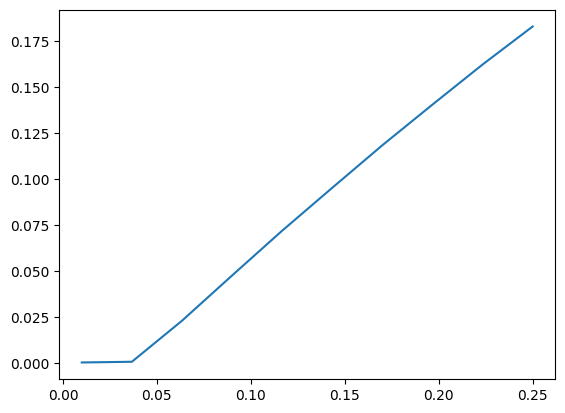

In [116]:
import matplotlib.pyplot as plt
plt.plot(currents, powers)
plt.show()


In [37]:
print(itc.qcw_mode)
print(itc.modulation)

PULS

False


In [12]:
out = itc.itc.query("output:protection:keylock:tripped?")
print(out, int(out), bool(int(out)))

0
 0 False


In [86]:
itc.laser_current

'1.800000E-01\n'